# TS1: Síntesis de señales

## Alumno: Felipe Berganza

1) Sintetizar y graficar:

a.Una señal sinusoidal de 2KHz.

b.Misma señal amplificada y desfazada en π/2.

c.Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.

d.Señal anterior recortada al 75% de su amplitud.

e.Una señal cuadrada de 4KHz.

f.Un pulso rectangular de 10ms.

g.En cada caso indique tiempo entre muestras, número de muestras y potencia o energía según corresponda.

# INTRODUCCION 

1. Sintetizar señales

Para llevar a cabo este punto vamos a definir varios parametros fundamentales:

a. fs = Frecuencia de muestreo 
    " Es la cantidad de muestras que se muestran por unidad de tiempo, unidad en [Hz] " 
    
b. t_total = tiempo total 
    " Duracion de la senal a analizar, unidad en [seg] "

c. nn = fs*t_total (numero de muestras)
    " Es la cantidad de puntos que tendra la senal, en el curso seran lo llamaeros cantidad de muestras y se define como la frecuencia de muestras por        el tiempo que visualizamos de la senal"

d. Ts = 1/fs (tiempo entre muestras) 
    " Es el tiempo medido que transcure entre cada muestra " 

## Funcion seno y de onda cuadra se van a parametrizar utilizando los siguientes valores:

    funcion_sen(vmax, dc, ff, ph, nn, fs) / funcion_cuadrada(vmax, dc, ff, nn, fs)
    
vmax = valor pico maximo de la senal, utilizado de forma practica como la amplitud de la senal. 

dc = se utiliza para correr toda la senal respecto al eje vertical, el famoso offset de la senal. 

ff = cantidad de ciclos completos por segundo

ph = fase de la senal, parametro que dezplaza horizotalmente la senal 

nn = numero de muestras 

fs = frecuencia de muestreo 

## La funcion pulso rectangular 

    pulso_rectangular(amplitud, duracion_total, fs, duracion_pulso, inicio=0)

amplitud = altura del pulso cuando esta activo 

duracion_total = longitud total de la senal generado 

fs = frecuencia de muestreo 

duracion_pulso = Cuánto tiempo dura el pulso activo

inicio = momento en el que se inicializa el pulso 

## Modulacion en Amplitud 

La modulacioon es el proceso de colocar la informacion contenida en una senal electronica de baja frecuencia en una de alta frecuencia. A la senal de alta frecuencia se la denomina portadora y a la de baja frecuencia senal moduladora. Si al colocar la informacion sobre la portadora se ocasiona que su amplitud varie de acuerdo con la senal moduladora, se designa al metodo como modulacio en amplotud. 

## Ortogonalidad entre senales 

Las señales y funciones ortogonales pueden ser herramientas muy útiles para el procesamiento de señales. En el lenguaje común, «ortogonal» significa perpendicular: si dos líneas son ortogonales, son perpendiculares.  las componentes real e imaginaria son perpendiculares entre sí; por lo tanto, son ortogonales. Pero ¿qué hace que dos señales sean ortogonales? La definición formal de señales ortogonales es que su producto interno (también llamado producto escalar) es cero.

## Correcilacion y Autocorrelacion de senales

La correlacion y autocorrelacion son herramientas que nos permiten analizar la relacion entre senales. La correlacion nos da indica la relacion o depencia entre dos senales  y  la autocorrelacion se compara la misma senal en diferentes momentos en el tiempo, esto no permite identificar patrones y comportamientos repetitivos en el tiempo. Su exprecion matematica es de la siguiente manera:

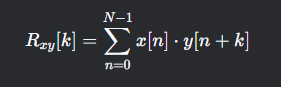




## 1.a Sintetizar y graficar: Una señal sinusoidal de 2KHz.

Tiempo entre muestras: 0.0227 ms
Número de muestras: 441

1. Señal sinusoidal de 2kHz - Potencia: 0.5000


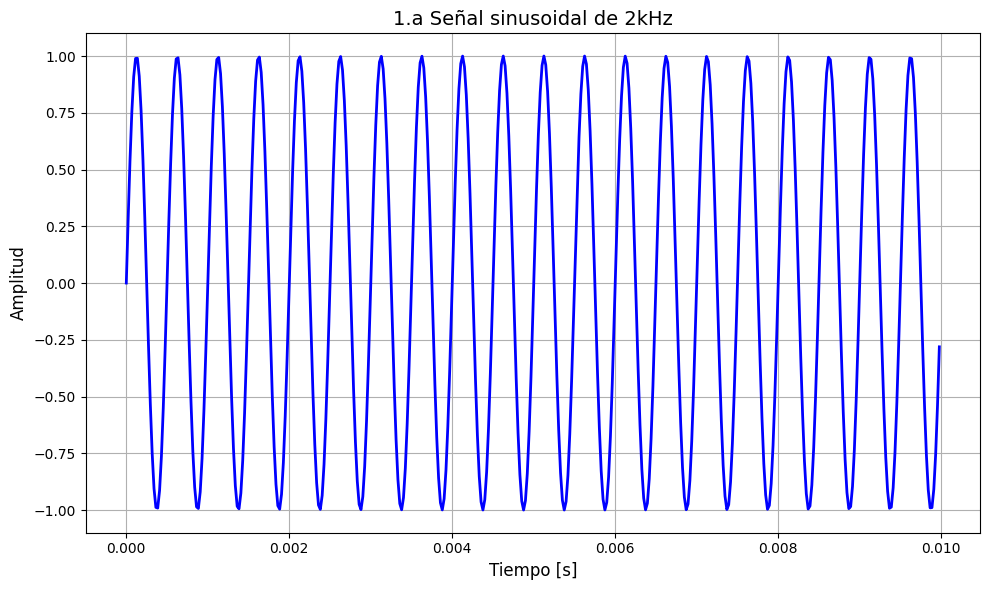

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import psutil

# Parámetros generales
fs = 44100  # Frecuencia de muestreo [Hz]
t_total = 0.01  # Tiempo total de simulación [s] (10 ms)
nn = int(fs * t_total)  # Número de muestras
Ts = 1/fs  # Tiempo entre muestras [s]

print(f"Tiempo entre muestras: {Ts*1000:.4f} ms")
print(f"Número de muestras: {nn}")

# Frecuencia fundamental
f1 = 2000  # 2 kHz

# 1.a Defino la funcion seno
def funcion_sen(vmax, dc, ff, ph, nn, fs):
    t_total = nn / fs  # Tiempo total de muestreo
    tt = np.linspace(0, t_total, nn, endpoint=False)  # Vector de tiempo
    
    # Creo la señal senoidal
    xx = vmax * np.sin(2 * np.pi * ff * tt + ph) + dc
    
    return tt, xx

# 1.a Señal sinusoidal de 2kHz
tt, xx1 = funcion_sen(vmax=1, dc=0, ff=f1, ph=0, nn=nn, fs=fs)
potencia_xx1 = np.mean(xx1**2)
print(f"\n1. Señal sinusoidal de 2kHz - Potencia: {potencia_xx1:.4f}")

# 1.a Señal sinusoidal de 2kHz
plt.figure(figsize=(10, 6))
plt.plot(tt[:1000], xx1[:1000], 'b-', linewidth=2)
plt.title('1.a Señal sinusoidal de 2kHz', fontsize=14)
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



En este punto se creo una funcion seno utilizando la libre de numpy, esta misma esta muestrada en un rango acorde para poder visualizar la funcion de forma detallada. 

## 1.b Misma señal amplificada y desfazada en π/2.

2. Señal amplificada y desfasada - Potencia: 2.0000


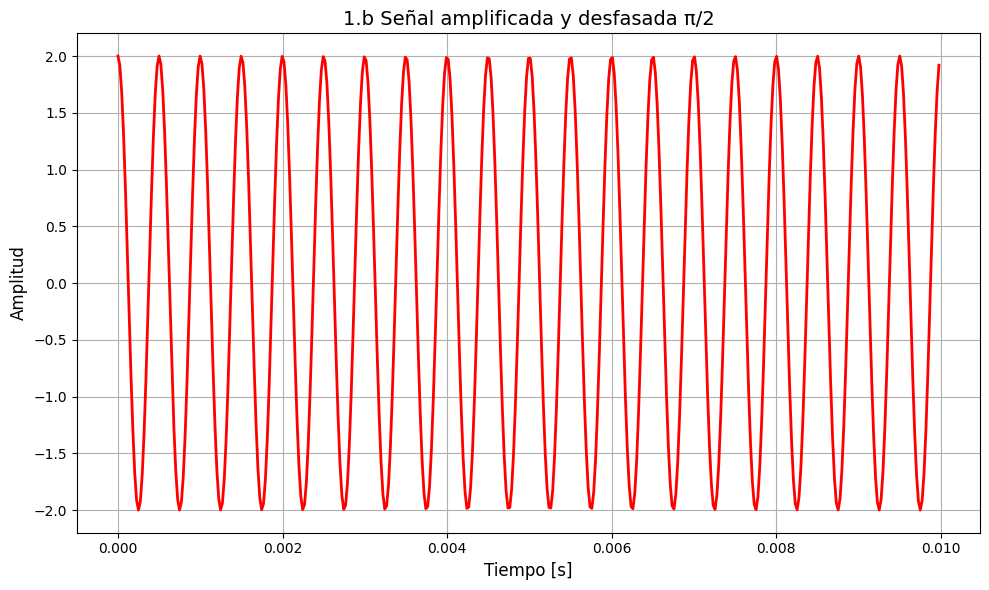

In [4]:
# 1.b Señal amplificada con un factor de 2 y desfasada en π/2 
tt, xx2 = funcion_sen(vmax=2, dc=0, ff=f1, ph=np.pi/2, nn=nn, fs=fs)
potencia_xx2 = np.mean(xx2**2)
print(f"2. Señal amplificada y desfasada - Potencia: {potencia_xx2:.4f}")

# 1.b Señal amplificada y desfasada
plt.figure(figsize=(10, 6))
plt.plot(tt[:1000], xx2[:1000], 'r-', linewidth=2)
plt.title('1.b Señal amplificada y desfasada π/2', fontsize=14)
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



## 1.c Señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.

La modulación en amplitud (AM) es una técnica donde la amplitud de una señal de alta frecuencia (portadora) varía en proporción a la amplitud de una señal de baja frecuencia (moduladora).

3. Señal modulada AM - Potencia: 0.2500


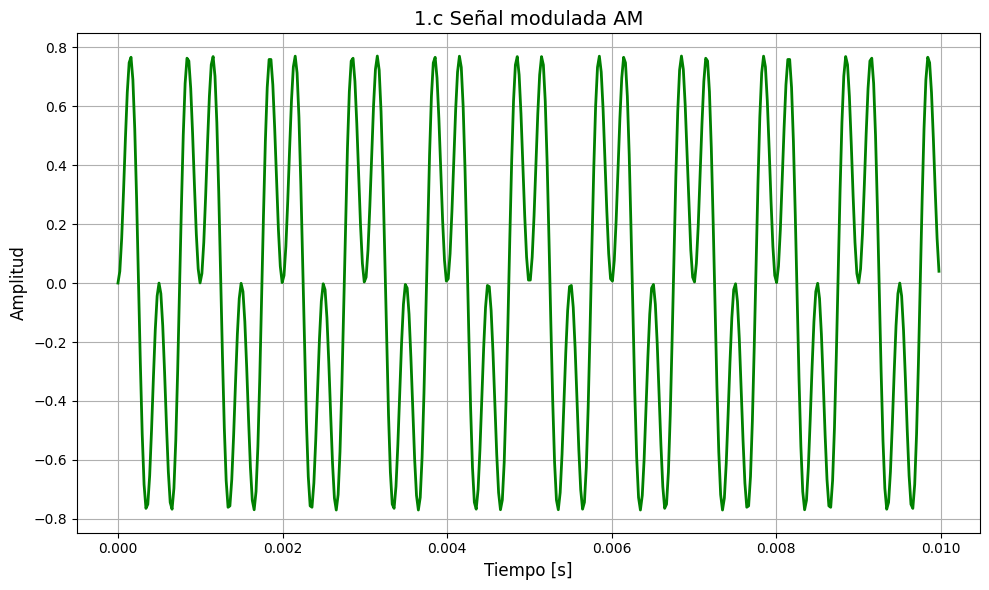

In [5]:
# 1.c Señal modulada en amplitud    
# Creo la señal moduladora (mitad de frecuencia)
tt, portadora = funcion_sen(vmax=1, dc=0, ff=f1/2, ph=0, nn=nn, fs=fs)
modulacion = xx1 * portadora
potencia_modulacion = np.mean(modulacion**2)
print(f"3. Señal modulada AM - Potencia: {potencia_modulacion:.4f}")

# 1.c Señal modulada AM
plt.figure(figsize=(10, 6))
plt.plot(tt[:2000], modulacion[:2000], 'g-', linewidth=2)
plt.title('1.c Señal modulada AM', fontsize=14)
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


## 1.d Señal original recortada al 75% de su amplitud.

4. Señal recortada al 75% - Potencia: 0.4455


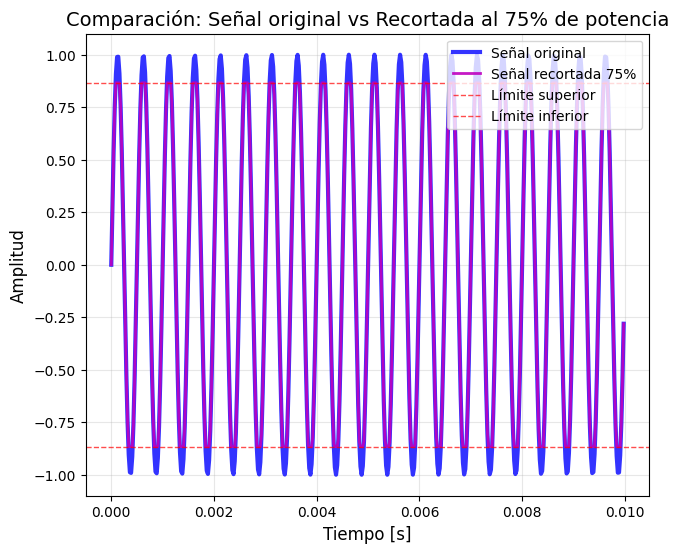

In [6]:
# 1.d Señal recortada al 75% de su potencia
# Calculo amplitud para 75% de potencia
amplitud_pico_original = np.max(np.abs(xx1))
potencia_original = (amplitud_pico_original**2) / 2
amplitud_pico_deseada = np.sqrt(2 * 0.75 * potencia_original)

# Recorto la señal
senal_recortada = np.clip(xx1, -amplitud_pico_deseada, amplitud_pico_deseada)
potencia_recortada = np.mean(senal_recortada**2)
print(f"4. Señal recortada al 75% - Potencia: {potencia_recortada:.4f}")


plt.figure(figsize=(16, 6))  
plt.subplot(1, 2, 2)
plt.plot(tt[:1000], xx1[:1000], 'b-', linewidth=3, label='Señal original', alpha=0.8)
plt.plot(tt[:1000], senal_recortada[:1000], 'm-', linewidth=2, label='Señal recortada 75%', alpha=0.9)
plt.axhline(y=amplitud_pico_deseada, color='r', linestyle='--', alpha=0.7, linewidth=1, label='Límite superior')
plt.axhline(y=-amplitud_pico_deseada, color='r', linestyle='--', alpha=0.7, linewidth=1, label='Límite inferior')
plt.title('Comparación: Señal original vs Recortada al 75% de potencia', fontsize=14)
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)

 ## 1.e Sintetizar y graficar Una señal cuadrada de 4KHz.

5. Onda cuadrada 4kHz - Potencia: 1.0000


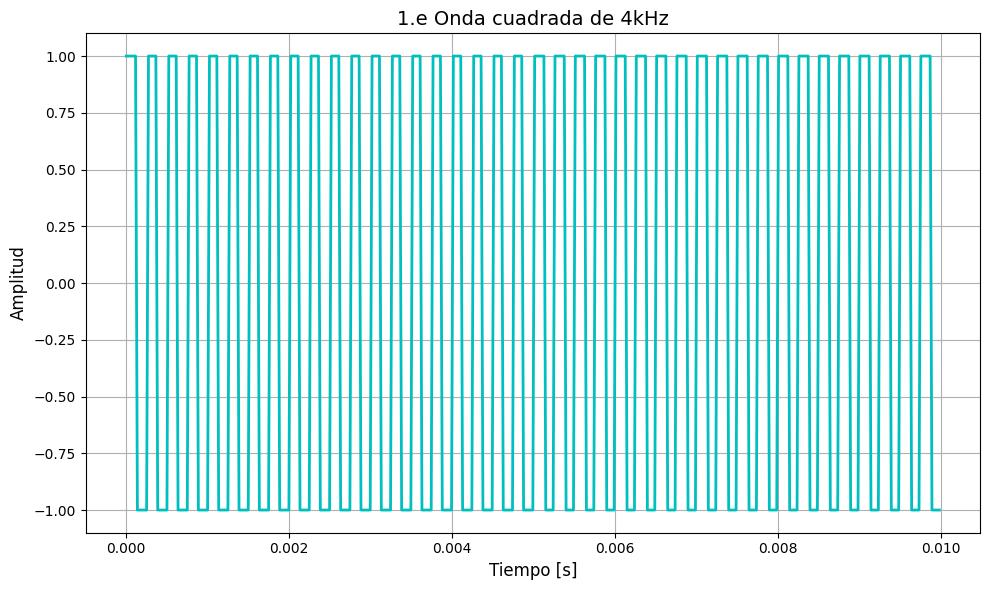

In [7]:
# 1.e Función para crear una onda cuadrada de 4kHz
def funcion_cuadrada(vmax, dc, ff, nn, fs):
    t_total = nn / fs
    tt = np.linspace(0, t_total, nn, endpoint=False)
    
    periodo = 1 / ff
    estado = (tt % periodo) < (0.5 * periodo)  # ciclo de trabajo de 50%
    xx = np.where(estado, vmax, -vmax) + dc
    
    return tt, xx

# Creo la onda cuadrada de 4kHz
tt, xx4 = funcion_cuadrada(vmax=1, dc=0, ff=4000, nn=nn, fs=fs)
potencia_xx4 = np.mean(xx4**2)
print(f"5. Onda cuadrada 4kHz - Potencia: {potencia_xx4:.4f}")

# 1.e Onda cuadrada de 4kHz
plt.figure(figsize=(10, 6))
plt.plot(tt[:2000], xx4[:2000], 'c-', linewidth=2)
plt.title('1.e Onda cuadrada de 4kHz', fontsize=14)
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

## 1.f Sintetizar y graficar un pulso rectangular de 10ms.

6. Pulso rectangular 10ms - Potencia: 0.3333


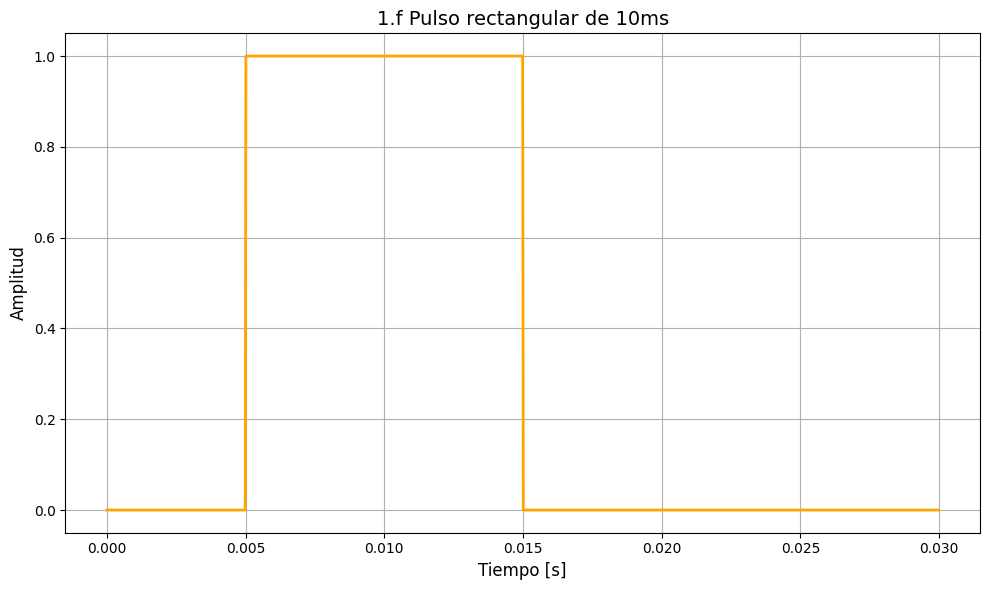

In [8]:
# 1.f Función para crear un pulso rectangular de 10ms
def pulso_rectangular(amplitud, duracion_total, fs, duracion_pulso, inicio=0):
    nn = int(fs * duracion_total)
    tt = np.linspace(0, duracion_total, nn, endpoint=False)
    
    pulso = np.zeros_like(tt)
    mask_pulso = (tt >= inicio) & (tt <= inicio + duracion_pulso)
    pulso[mask_pulso] = amplitud
    
    return tt, pulso

# Genero el pulso de 10 ms con la misma frecuencia de muestreo
tt_pulso, pulso_10ms = pulso_rectangular(amplitud=1, duracion_total=0.03, fs=fs, 
                                        duracion_pulso=0.01, inicio=0.005)
potencia_pulso = np.mean(pulso_10ms**2)
print(f"6. Pulso rectangular 10ms - Potencia: {potencia_pulso:.4f}")

# 1.6 Pulso rectangular de 10ms
plt.figure(figsize=(10, 6))
plt.plot(tt_pulso, pulso_10ms, 'orange', linewidth=2)
plt.title('1.f Pulso rectangular de 10ms', fontsize=14)
plt.xlabel('Tiempo [s]', fontsize=12)
plt.ylabel('Amplitud', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


# 2) Verificar ortogonalidad entre la primera señal y las demás.

La ortogonalidad entre dos funciones es una generalización del concepto de perpendicularidad entre vectores. Dos funciones se consideran ortogonales si su producto interno es cero.

In [9]:
def verificar_ortogonales(senal1, senal2, umbral=1e-10, verbose=True):
    if len(senal1) != len(senal2):
        if verbose:
            print("Tamaños diferentes")
        return False
    
    producto = np.dot(senal1.flatten(), senal2.flatten())
    ortogonal = abs(producto) < umbral
    
    if verbose:
        if ortogonal:
            print(f"SÍ son ortogonales ")
        else:
            print(f"NO son ortogonales ")
    
    return ortogonal

print("\n=== VERIFICACIÓN DE ORTOGONALIDAD ===")
print("1. xx1 vs xx1:")
verificar_ortogonales(xx1, xx1)

print("\n2. xx1 vs xx2 (seno y coseno):")
verificar_ortogonales(xx1, xx2)

print("\n3. xx1 vs modulación:")
min_len = min(len(xx1), len(modulacion))
verificar_ortogonales(xx1[:min_len], modulacion[:min_len])

print("\n4. xx1 vs señal recortada:")
verificar_ortogonales(xx1, senal_recortada)

print("\n5. xx1 vs xx4 (onda cuadrada 4kHz):")
min_len = min(len(xx1), len(xx4))
verificar_ortogonales(xx1[:min_len], xx4[:min_len])

print("\n6. xx1 vs pulso 10ms:")
pulso_resized = np.interp(np.linspace(0, 1, len(xx1)), 
                         np.linspace(0, 1, len(pulso_10ms)), 
                         pulso_10ms.flatten())
verificar_ortogonales(xx1, pulso_resized)


=== VERIFICACIÓN DE ORTOGONALIDAD ===
1. xx1 vs xx1:
NO son ortogonales 

2. xx1 vs xx2 (seno y coseno):
SÍ son ortogonales 

3. xx1 vs modulación:
SÍ son ortogonales 

4. xx1 vs señal recortada:
NO son ortogonales 

5. xx1 vs xx4 (onda cuadrada 4kHz):
NO son ortogonales 

6. xx1 vs pulso 10ms:
NO son ortogonales 


np.False_

# 3) Graficar la autocorrelación de la primera señal y la correlación entre ésta y las demás.

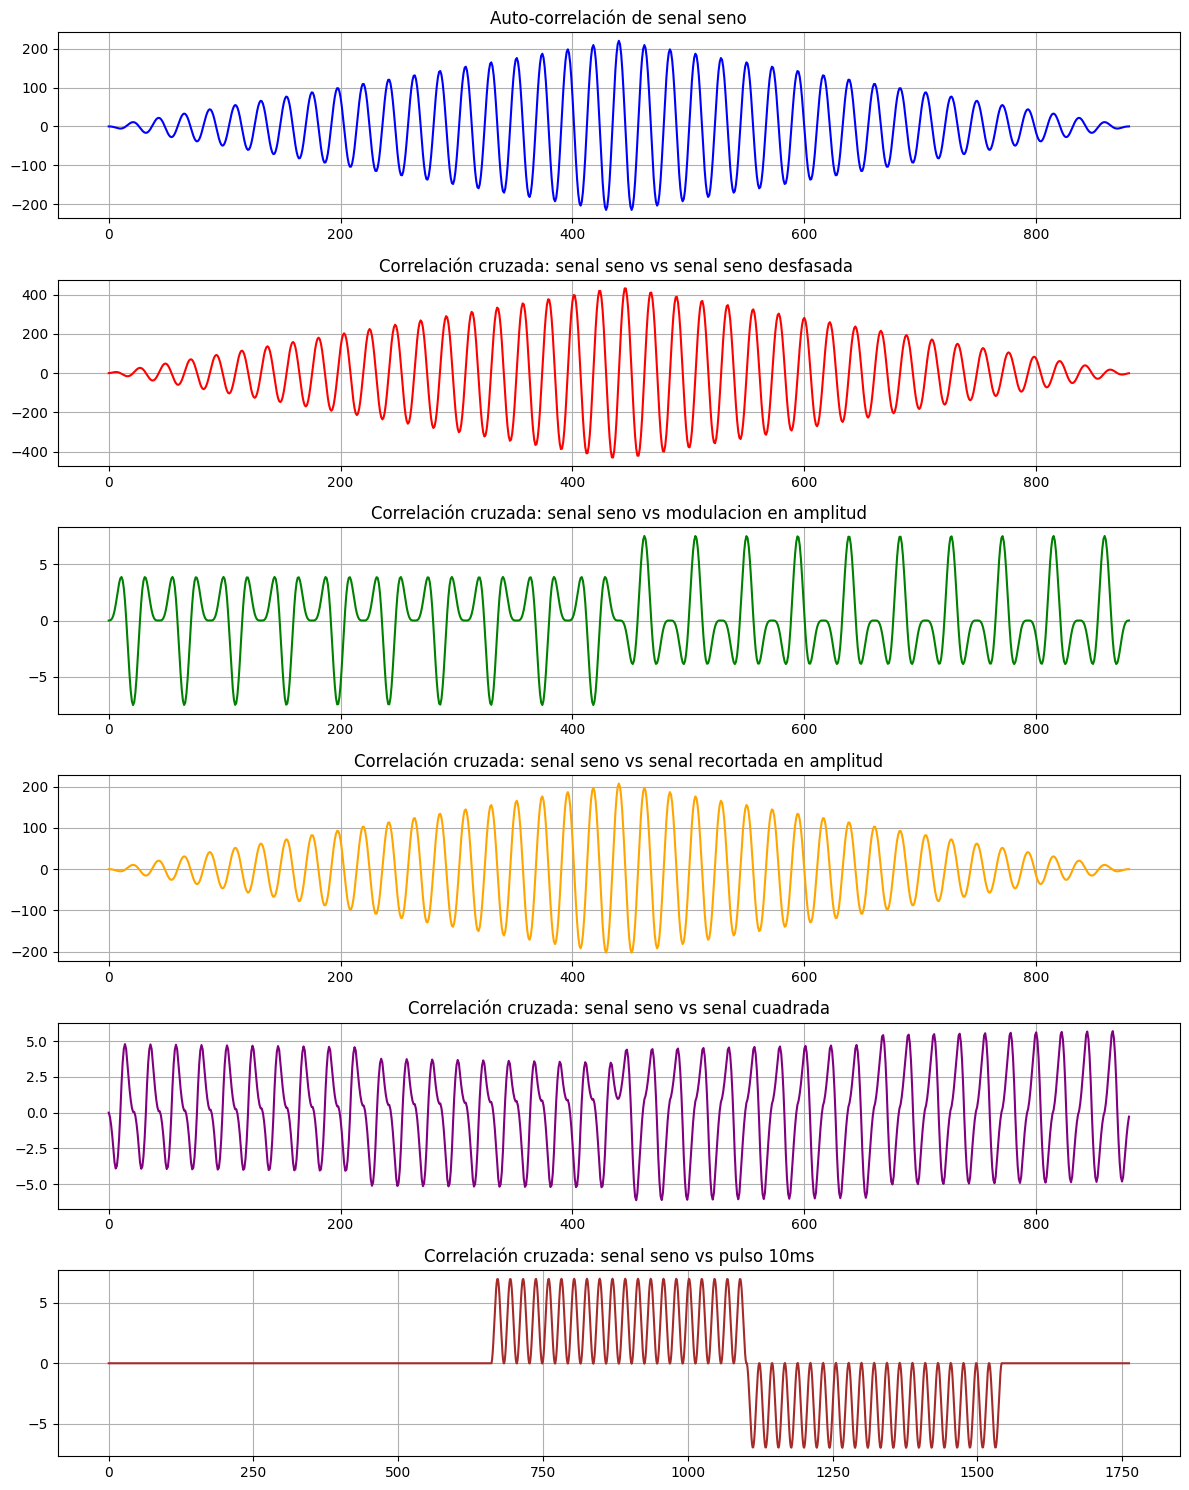

In [17]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sig


plt.figure(figsize=(12, 15))

# Subplot 1: Auto-correlación de xx1
plt.subplot(6, 1, 1)
plt.plot(np.correlate(xx1, xx1, mode='full'), color='blue')
plt.title("Auto-correlación de senal seno")
plt.grid(True)

# Subplot 2: Correlación cruzada xx1-xx2
plt.subplot(6, 1, 2)
plt.plot(np.correlate(xx1, xx2, mode='full'), color='red')
plt.title("Correlación cruzada: senal seno vs senal seno desfasada ")
plt.grid(True)

# Subplot 3: Correlación cruzada xx1-modulacion
plt.subplot(6, 1, 3)
plt.plot(np.correlate(xx1, modulacion, mode='full'), color='green')
plt.title("Correlación cruzada: senal seno vs modulacion en amplitud")
plt.grid(True)

# Subplot 4: Correlación cruzada xx1-senal_recortada
plt.subplot(6, 1, 4)
plt.plot(np.correlate(xx1, senal_recortada, mode='full'), color='orange')
plt.title("Correlación cruzada: senal seno vs senal recortada en amplitud")
plt.grid(True)

# Subplot 5: Correlación cruzada xx1-xx4
plt.subplot(6, 1, 5)
plt.plot(np.correlate(xx1, xx4, mode='full'), color='purple')
plt.title("Correlación cruzada: senal seno vs senal cuadrada")
plt.grid(True)

# Subplot 6: Correlación cruzada xx1-pulso_10ms
plt.subplot(6, 1, 6)
plt.plot(np.correlate(xx1, pulso_10ms, mode='full'), color='brown')
plt.title("Correlación cruzada: senal seno vs pulso 10ms")
plt.grid(True)

plt.tight_layout()  
plt.show()

# 4) Demostrar propiedad trigonometrica



=== DEMOSTRACIÓN PROPIEDAD TRIGONOMÉTRICA ===
2⋅sin(α)⋅sin(β) = cos(α-β) - cos(α+β)
Diferencia máxima entre ambos lados: 7.22e-15
La igualdad se cumple


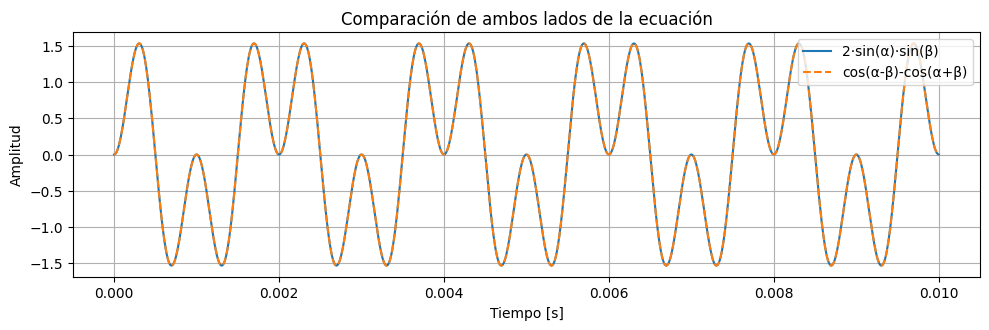

In [11]:
print("\n=== DEMOSTRACIÓN PROPIEDAD TRIGONOMÉTRICA ===")
print("2⋅sin(α)⋅sin(β) = cos(α-β) - cos(α+β)")

# Definir parámetros
frecuencia = 1000  # 1 kHz
t = np.linspace(0, 0.01, 1000)  # 10 ms
alpha = 2 * np.pi * frecuencia * t
beta = 2 * np.pi * frecuencia/2 * t  # β es la mitad de α

# Calcular ambos lados de la ecuación
lado_izq = 2 * np.sin(alpha) * np.sin(beta)
lado_der = np.cos(alpha - beta) - np.cos(alpha + beta)

# Verificar igualdad
diferencia = np.max(np.abs(lado_izq - lado_der))
print(f"Diferencia máxima entre ambos lados: {diferencia:.2e}")

if diferencia < 1e-10:
    print("La igualdad se cumple")
else:
    print("La igualdad NO se cumple")

# Graficar
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, lado_izq, label='2⋅sin(α)⋅sin(β)')
plt.plot(t, lado_der, '--', label='cos(α-β)-cos(α+β)')
plt.title('Comparación de ambos lados de la ecuación')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Conclusion 

En el TS1 tuve mi primero acercamiento a la generacion de senales via python por lo cual tuve que acudir a una IA en la implementacion de codigo y por consecuencia graficamente tambien. En cuanto a lo aprendido en lo que consta de temas teoricos, luego de investigar por mi cuenta, aprendi sobre tiempo entre muestreos, frecuencias de muestreo y numero de muestras. Esto ultimo es la primer aproximacion que tengo y pude aprenderlo y llevarlo a cabo.  